# import

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path  
from collections import Counter

from gensim.models import Word2Vec

In [4]:
from neattext import TextCleaner, TextFrame, TextMetrics
from deep_translator import GoogleTranslator

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# abstract

In [7]:
raw_abstract = pd.read_csv("data/db_abstract.csv")

In [8]:
raw_abstract = raw_abstract[:20000]

In [9]:
raw_abstract = raw_abstract[raw_abstract.abstract.apply(len) < 5000]
raw_abstract = raw_abstract.reset_index(drop=True)

In [10]:
raw_abstract

,_id,abstract
0,53e99784b7602d9701f3e133,Drought is the first place in all the natural ...
1,53e99784b7602d9701f3e15d,As process variations become a significant pro...
2,53e99784b7602d9701f3e161,360° represents the concerns that are addresse...
3,53e99784b7602d9701f3e4f4,"""2BTextures"", a two-movement audio/visual expe..."
4,53e99784b7602d9701f3eaf2,Constructing a system that can cope with a dyn...
...,...,...
19955,53e99808b7602d970201b271,Internet/Intranet security has witnessed an ex...
19956,53e99808b7602d970201b980,We consider strategies for reducing ambiguity ...
19957,53e99808b7602d970201b981,In this paper we deal with a recently develope...
19958,53e99808b7602d970201b982,We are interested in the development of a data...


# main

In [11]:
raw_main = pd.read_csv("data/db_main_table.csv")

In [37]:
raw_main.n_citation_local.unique()

array([0], dtype=int64)

In [12]:
raw_main = raw_main.drop(columns=['Unnamed: 0', 'n_citation_local', 'n_citation_global', 'year'])

In [13]:
raw_main

,_id,title
0,53e99784b7602d9701f3e3f5,3GIO.
1,53e99784b7602d9701f3e133,The relationship between canopy parameters and...
2,53e99784b7602d9701f3e151,A solution to the problem of touching and brok...
3,53e99784b7602d9701f3e15d,Timing yield estimation using statistical stat...
4,53e99784b7602d9701f3e161,360°
...,...,...
5354304,6087e112e4510cd7c80b912b,Language Preferences in Romanian Communication...
5354305,6087e112e4510cd7c80b912a,Influence and Relationship between Branded Con...
5354306,6087e112e4510cd7c80b912c,Web of Science (WoS) and Scopus: The Titans of...
5354307,6087e112e4510cd7c80b912d,The Pioneering Role of Sci in Post Publication...


In [14]:
df = raw_abstract.join(raw_main.set_index('_id'), on='_id', how='inner')

In [15]:
df

,_id,abstract,title
0,53e99784b7602d9701f3e133,Drought is the first place in all the natural ...,The relationship between canopy parameters and...
1,53e99784b7602d9701f3e15d,As process variations become a significant pro...,Timing yield estimation using statistical stat...
2,53e99784b7602d9701f3e161,360° represents the concerns that are addresse...,360°
3,53e99784b7602d9701f3e4f4,"""2BTextures"", a two-movement audio/visual expe...",2BTextures
4,53e99784b7602d9701f3eaf2,Constructing a system that can cope with a dyn...,11MonkeysII
...,...,...,...
19955,53e99808b7602d970201b271,Internet/Intranet security has witnessed an ex...,Cryptographic Key Recovery
19956,53e99808b7602d970201b980,We consider strategies for reducing ambiguity ...,Cross Modal Disambiguation
19957,53e99808b7602d970201b981,In this paper we deal with a recently develope...,Czech MWE Database
19958,53e99808b7602d970201b982,We are interested in the development of a data...,Coordinating Mobile Databases


In [46]:
def tranlator(txt):
    return GoogleTranslator(source='auto', target='en').translate(txt)

In [48]:
def trans(x):
    try:
        return tranlator(x)
    except:
        print(x)

In [49]:
df.title.apply(trans)

1
7373170279850


0        The relationship between canopy parameters and...
1        Timing yield estimation using statistical stat...
2                                                     360°
3                                               2BTextures
4                                              11MonkeysII
                               ...                        
19955                           Cryptographic Key Recovery
19956                           Cross Modal Disambiguation
19957                                   Czech MWE Database
19958                        Coordinating Mobile Databases
19959                         Controlled Model Exploration
Name: title, Length: 19960, dtype: object

In [55]:
df = df[~(df.title == '1')]

In [ ]:
df = df[~(df.title == '7373170279850')]

In [70]:
df

,_id,abstract,title
0,53e99784b7602d9701f3e133,drought is the first place in all the natural ...,the relationship between canopy parameters and...
1,53e99784b7602d9701f3e15d,as process variations become a significant pro...,timing yield estimation using statistical stat...
2,53e99784b7602d9701f3e161,360° represents the concerns that are addresse...,360°
3,53e99784b7602d9701f3e4f4,"""2btextures"", a two-movement audio/visual expe...",2btextures
4,53e99784b7602d9701f3eaf2,constructing a system that can cope with a dyn...,11monkeysii
...,...,...,...
19955,53e99808b7602d970201b271,internet/intranet security has witnessed an ex...,cryptographic key recovery
19956,53e99808b7602d970201b980,we consider strategies for reducing ambiguity ...,cross modal disambiguation
19957,53e99808b7602d970201b981,in this paper we deal with a recently develope...,czech mwe database
19958,53e99808b7602d970201b982,we are interested in the development of a data...,coordinating mobile databases


In [59]:
df.title = df.title.apply(lambda x: tranlator(x))

In [17]:
df.abstract = df.abstract.apply(lambda x: tranlator(x))

In [61]:
df.title = df.title.apply(lambda x: x.lower())

In [69]:
df.abstract = df.abstract.apply(lambda x: x.lower())

C:\Users\bmw_7\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [68]:
df = df.dropna()

In [71]:
df = df.reset_index(drop=True)

In [72]:
df

,_id,abstract,title
0,53e99784b7602d9701f3e133,drought is the first place in all the natural ...,the relationship between canopy parameters and...
1,53e99784b7602d9701f3e15d,as process variations become a significant pro...,timing yield estimation using statistical stat...
2,53e99784b7602d9701f3e161,360° represents the concerns that are addresse...,360°
3,53e99784b7602d9701f3e4f4,"""2btextures"", a two-movement audio/visual expe...",2btextures
4,53e99784b7602d9701f3eaf2,constructing a system that can cope with a dyn...,11monkeysii
...,...,...,...
19949,53e99808b7602d970201b271,internet/intranet security has witnessed an ex...,cryptographic key recovery
19950,53e99808b7602d970201b980,we consider strategies for reducing ambiguity ...,cross modal disambiguation
19951,53e99808b7602d970201b981,in this paper we deal with a recently develope...,czech mwe database
19952,53e99808b7602d970201b982,we are interested in the development of a data...,coordinating mobile databases


In [73]:
def clean_abstract(txt):
    docx = TextCleaner(txt)
    res = docx.remove_emails().remove_urls().remove_numbers().remove_phone_numbers().remove_special_characters().remove_stopwords().remove_accents()
    return res

In [74]:
df.abstract = df.abstract.apply(lambda x: clean_abstract(x))

In [77]:
def clean_title(txt):
    docx = TextCleaner(txt)
    res = docx.remove_numbers().remove_special_characters().remove_stopwords().remove_accents()
    return res

In [78]:
df.title = df.title.apply(lambda x: clean_title(x))

In [79]:
df

,_id,abstract,title
0,53e99784b7602d9701f3e133,drought place natural disasters world especial...,relationship canopy parameters spectrum winter...
1,53e99784b7602d9701f3e15d,process variations significant problem deep su...,timing yield estimation statistical static tim...
2,53e99784b7602d9701f3e161,represents concerns addressed work approach ef...,
3,53e99784b7602d9701f3e4f4,btextures twomovement audiovisual experience l...,btextures
4,53e99784b7602d9701f3eaf2,constructing system cope dynamically changing ...,monkeysii
...,...,...,...
19949,53e99808b7602d970201b271,internetintranet security witnessed explosive ...,cryptographic key recovery
19950,53e99808b7602d970201b980,consider strategies reducing ambiguity multimo...,cross modal disambiguation
19951,53e99808b7602d970201b981,paper deal recently developed large czech mwe ...,czech mwe database
19952,53e99808b7602d970201b982,interested development database management lay...,coordinating mobile databases


In [88]:
df.loc[df.title == '', "title"] = np.nan

In [92]:
df = df.dropna()

In [94]:
df = df.reset_index(drop=True)

In [95]:
df

,_id,abstract,title
0,53e99784b7602d9701f3e133,drought place natural disasters world especial...,relationship canopy parameters spectrum winter...
1,53e99784b7602d9701f3e15d,process variations significant problem deep su...,timing yield estimation statistical static tim...
2,53e99784b7602d9701f3e4f4,btextures twomovement audiovisual experience l...,btextures
3,53e99784b7602d9701f3eaf2,constructing system cope dynamically changing ...,monkeysii
4,53e99784b7602d9701f3f8c1,presents welcome message conference proceedings,foreword
...,...,...,...
19910,53e99808b7602d970201b271,internetintranet security witnessed explosive ...,cryptographic key recovery
19911,53e99808b7602d970201b980,consider strategies reducing ambiguity multimo...,cross modal disambiguation
19912,53e99808b7602d970201b981,paper deal recently developed large czech mwe ...,czech mwe database
19913,53e99808b7602d970201b982,interested development database management lay...,coordinating mobile databases


In [96]:
def normalize(txt):
    docx = TextFrame(txt)
    res = docx.normalize(level='deep')
    return res

In [139]:
df.abstract = df.abstract.apply(lambda x: normalize(x))
df.title = df.title.apply(lambda x: normalize(x))

AttributeError: 'list' object has no attribute 'lower'

In [121]:
df

,_id,abstract,title
0,53e99784b7602d9701f3e133,drought place natural disasters world especial...,relationship canopy parameters spectrum winter...
1,53e99784b7602d9701f3e15d,process variations significant problem deep su...,timing yield estimation statistical static tim...
2,53e99784b7602d9701f3e4f4,btextures twomovement audiovisual experience l...,btextures
3,53e99784b7602d9701f3eaf2,constructing system cope dynamically changing ...,monkeysii
4,53e99784b7602d9701f3f8c1,presents welcome message conference proceedings,foreword
...,...,...,...
19910,53e99808b7602d970201b271,internetintranet security witnessed explosive ...,cryptographic key recovery
19911,53e99808b7602d970201b980,consider strategies reducing ambiguity multimo...,cross modal disambiguation
19912,53e99808b7602d970201b981,paper deal recently developed large czech mwe ...,czech mwe database
19913,53e99808b7602d970201b982,interested development database management lay...,coordinating mobile databases


In [160]:
# df = df.dropna()

In [161]:
# df = df.reset_index(drop=True)

In [13]:
df.abstract = df.abstract.apply(lambda x: x.split(' '))
df.title = df.title.apply(lambda x: x.split(' '))

In [163]:
def count_tokens(data: list) -> Counter:
#     logger.info("Counting frequencies of tokens")
    counter = Counter()
    for line in data:
        for word in line:
            counter[word] += 1
    return counter

In [164]:
token_frequencies = count_tokens(df.abstract.values)

In [16]:
token_frequencies = count_tokens(df.title.values)

In [165]:
def get_most_common_tokens(token_frequencies: Counter, top_perc: float = 0.01) -> list:
#     logger.info("Getting most common tokens")
    perc = round(len(token_frequencies) * top_perc)
    most_common_tokens = token_frequencies.most_common(perc)
    return [item[0] for item in most_common_tokens]


def get_least_common_tokens(token_frequencies: Counter) -> list:
#     logger.info("Getting least common tokens")
    return [key for key, value in token_frequencies.items() if value == 1]


def get_one_symbol_tokens(token_frequencies: Counter) -> list:
#     logger.info("Getting one symbol tokens")
    return [key for key, _ in token_frequencies.items() if len(key) == 1]


def clean_tokens(data: pd.DataFrame, col: str, drop_words: list):
#     logger.info("Cleaning tokens")
    data[col] = data[col].apply(lambda x: [token for token in x if token not in drop_words])

In [166]:
most_common_tokens = get_most_common_tokens(token_frequencies)
least_common_tokens = get_least_common_tokens(token_frequencies)
one_symbol_tokens = get_one_symbol_tokens(token_frequencies)

In [167]:
drop_words = []
drop_words.extend(most_common_tokens)
drop_words.extend(least_common_tokens)
drop_words.extend(one_symbol_tokens)

In [168]:
clean_tokens(df, 'abstract', drop_words)

In [22]:
clean_tokens(df, 'title', drop_words)

In [169]:
df

,_id,abstract,title
0,53e99784b7602d9701f3e133,[],relationship canopy parameters spectrum winter...
1,53e99784b7602d9701f3e15d,[],timing yield estimation statistical static tim...
2,53e99784b7602d9701f3e4f4,[],btextures
3,53e99784b7602d9701f3eaf2,[],monkeysii
4,53e99784b7602d9701f3f8c1,[],foreword
...,...,...,...
19897,53e99808b7602d970201b271,[],cryptographic key recovery
19898,53e99808b7602d970201b980,[],cross modal disambiguation
19899,53e99808b7602d970201b981,[],czech mwe database
19900,53e99808b7602d970201b982,[],coordinating mobile databases


In [24]:
df = df[df.title.apply(len) > 0] 

In [47]:
filepath = Path('data/cluster_df_clean.csv')   
df.to_csv(filepath, index=False)  

In [75]:
df = pd.read_csv('data/cluster_df_clean.csv')

In [128]:
df

,_id,abstract,title
0,53e99784b7602d9701f3e133,"['disasters', 'north', 'china', 'plain', 'soil...","['canopy', 'spectrum', 'winter', 'wheat', 'irr..."
1,53e99784b7602d9701f3e15d,"['variations', 'deep', 'submicron', 'shift', '...","['timing', 'yield', 'timing']"
2,53e99784b7602d9701f3eaf2,"['constructing', 'cope', 'dynamically', 'chang...",['monkeysii']
3,53e99784b7602d9701f3f8c1,"['welcome', 'proceedings']",['foreword']
4,53e99784b7602d9701f3f8c2,"['biomolecular', 'molecular', 'biology', 'cont...",['foreword']
...,...,...,...
17949,53e99808b7602d970201b271,"['witnessed', 'explosive', 'exciting', 'growth...","['cryptographic', 'recovery']"
17950,53e99808b7602d970201b980,"['reducing', 'ambiguity', 'multimodal', 'conta...","['cross', 'modal', 'disambiguation']"
17951,53e99808b7602d970201b981,"['deal', 'czech', 'mwe', 'containing', 'moment...","['czech', 'mwe']"
17952,53e99808b7602d970201b982,"['interested', 'layer', 'completely', 'portabl...",['coordinating']


In [129]:
from ast import literal_eval
final = (df.abstract.apply(literal_eval) + df.title.apply(literal_eval))

In [132]:
final

0        [disasters, north, china, plain, soil, water, ...
1        [variations, deep, submicron, shift, determini...
2        [constructing, cope, dynamically, changing, gr...
3                         [welcome, proceedings, foreword]
4        [biomolecular, molecular, biology, contributio...
                               ...                        
17949    [witnessed, explosive, exciting, growth, excit...
17950    [reducing, ambiguity, multimodal, containing, ...
17951    [deal, czech, mwe, containing, moment, mwes, t...
17952    [interested, layer, completely, portable, plug...
17953    [detailed, weak, fragments, modal, fragments, ...
Length: 17954, dtype: object

In [138]:
data = pd.DataFrame(final, columns=['tokens'])

In [141]:
data['_id'] = df['_id']

In [145]:
data['vector'] = None

In [146]:
data

,tokens,_id,vector
0,"[disasters, north, china, plain, soil, water, ...",53e99784b7602d9701f3e133,None
1,"[variations, deep, submicron, shift, determini...",53e99784b7602d9701f3e15d,None
2,"[constructing, cope, dynamically, changing, gr...",53e99784b7602d9701f3eaf2,None
3,"[welcome, proceedings, foreword]",53e99784b7602d9701f3f8c1,None
4,"[biomolecular, molecular, biology, contributio...",53e99784b7602d9701f3f8c2,None
...,...,...,...
17949,"[witnessed, explosive, exciting, growth, excit...",53e99808b7602d970201b271,None
17950,"[reducing, ambiguity, multimodal, containing, ...",53e99808b7602d970201b980,None
17951,"[deal, czech, mwe, containing, moment, mwes, t...",53e99808b7602d970201b981,None
17952,"[interested, layer, completely, portable, plug...",53e99808b7602d970201b982,None


In [77]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [192]:
w2v_model_2 = Word2Vec(final, 
                       min_count=0,
                       window=5,
                       sample=1e-5, 
                       alpha=0.01, 
                       min_alpha=3e-4, 
                       vector_size=300,
                       negative=10,
                       workers=cores-1)

In [193]:
w2v_model_2.wv.key_to_index

{'bayesian': 0,
 'automated': 1,
 'electronic': 2,
 'privacy': 3,
 'genetic': 4,
 'multimedia': 5,
 'concurrent': 6,
 'speech': 7,
 'coding': 8,
 'channel': 9,
 'robot': 10,
 'synthesis': 11,
 'generating': 12,
 'volume': 13,
 'nonlinear': 14,
 'minimal': 15,
 'texture': 16,
 'checking': 17,
 'log': 18,
 'sequential': 19,
 'sampling': 20,
 'java': 21,
 'word': 22,
 'flexible': 23,
 'prediction': 24,
 'similarity': 25,
 'report': 26,
 'existence': 27,
 'total': 28,
 'free': 29,
 'tracking': 30,
 'perspective': 31,
 'animation': 32,
 'response': 33,
 'let': 34,
 'identification': 35,
 'attacks': 36,
 'structural': 37,
 'infinite': 38,
 'parameter': 39,
 'suggest': 40,
 'simulations': 41,
 'specifications': 42,
 'speed': 43,
 'index': 44,
 'compression': 45,
 'processors': 46,
 'errors': 47,
 'architectures': 48,
 'platform': 49,
 'procedures': 50,
 'note': 51,
 'factor': 52,
 'constructed': 53,
 'capabilities': 54,
 'category': 55,
 'page': 56,
 'characterization': 57,
 'secure': 58,
 'e

In [135]:
w2v_model_2.save("word2vec.model")

In [195]:
import functools
def vectorize_abstract(data, corpus, model, vector_size=100):
    for i, _id in enumerate(data["_id"]):
        abst = data[data["_id"] == _id]["tokens"] 
        abst_vectors = [model.wv[word] for word in corpus[i]]
        abst_total_vector = np.array(functools.reduce(lambda x, y: x + y, abst_vectors) / len(corpus[i]))[..., np.newaxis]
        data.loc[data["_id"] == _id, "vector"] = [abst_total_vector]

In [187]:
corpus = list(final)

In [196]:
vectorize_abstract(data, corpus, w2v_model_2)

In [201]:
data

,tokens,_id,vector
0,"[disasters, north, china, plain, soil, water, ...",53e99784b7602d9701f3e133,"[[0.0026838344], [0.0016127873], [0.007130103]..."
1,"[variations, deep, submicron, shift, determini...",53e99784b7602d9701f3e15d,"[[0.0034696253], [0.0033773829], [0.010877214]..."
2,"[constructing, cope, dynamically, changing, gr...",53e99784b7602d9701f3eaf2,"[[0.0031891991], [0.0022976154], [0.010080342]..."
3,"[welcome, proceedings, foreword]",53e99784b7602d9701f3f8c1,"[[0.00234202], [0.0012482348], [0.004333031], ..."
4,"[biomolecular, molecular, biology, contributio...",53e99784b7602d9701f3f8c2,"[[0.003227246], [0.0027810044], [0.009034733],..."
...,...,...,...
17949,"[witnessed, explosive, exciting, growth, excit...",53e99808b7602d970201b271,"[[0.0038913274], [0.0025569054], [0.008529539]..."
17950,"[reducing, ambiguity, multimodal, containing, ...",53e99808b7602d970201b980,"[[0.0027406858], [0.0020973242], [0.008612389]..."
17951,"[deal, czech, mwe, containing, moment, mwes, t...",53e99808b7602d970201b981,"[[0.0028659499], [0.0016204157], [0.006706886]..."
17952,"[interested, layer, completely, portable, plug...",53e99808b7602d970201b982,"[[0.0025326964], [0.002720653], [0.007890217],..."


In [204]:
vectors = np.array(list(data["vector"])).reshape(len(data), 300)

In [206]:
scaler = MinMaxScaler()
df_final = scaler.fit_transform(vectors)

In [217]:
Sum_of_squared_distances = []
K = range(2, 20)
for k in K:
    km = KMeans(n_clusters=k, random_state=0, verbose=1, init='k-means++')
    km = km.fit(df_final)
    Sum_of_squared_distances.append(km.inertia_)

Initialization complete
Iteration 0, inertia 34407.1171875
Iteration 1, inertia 21859.326171875
Iteration 2, inertia 21183.775390625
Iteration 3, inertia 20851.84765625
Iteration 4, inertia 20699.037109375
Iteration 5, inertia 20624.970703125
Iteration 6, inertia 20592.669921875
Iteration 7, inertia 20576.6171875
Iteration 8, inertia 20568.2890625
Iteration 9, inertia 20564.939453125
Iteration 10, inertia 20563.70703125
Iteration 11, inertia 20562.998046875
Iteration 12, inertia 20562.716796875
Iteration 13, inertia 20562.6875
Iteration 14, inertia 20562.658203125
Converged at iteration 14: center shift 4.833794946534908e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 36115.640625
Iteration 1, inertia 22728.31640625
Iteration 2, inertia 21638.9140625
Iteration 3, inertia 21068.4140625
Iteration 4, inertia 20799.666015625
Iteration 5, inertia 20672.216796875
Iteration 6, inertia 20614.08203125
Iteration 7, inertia 20587.984375
Iteration 8, inerti

Iteration 18, inertia 17656.474609375
Iteration 19, inertia 17656.255859375
Iteration 20, inertia 17655.95703125
Iteration 21, inertia 17655.77734375
Iteration 22, inertia 17655.728515625
Iteration 23, inertia 17655.65625
Iteration 24, inertia 17655.63671875
Iteration 25, inertia 17655.6484375
Iteration 26, inertia 17655.59765625
Iteration 27, inertia 17655.603515625
Converged at iteration 27: center shift 1.8178901939336356e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 30402.916015625
Iteration 1, inertia 18101.990234375
Iteration 2, inertia 17818.5390625
Iteration 3, inertia 17747.7109375
Iteration 4, inertia 17718.69140625
Iteration 5, inertia 17698.798828125
Iteration 6, inertia 17686.76953125
Iteration 7, inertia 17678.861328125
Iteration 8, inertia 17672.12890625
Iteration 9, inertia 17666.85546875
Iteration 10, inertia 17663.33203125
Iteration 11, inertia 17661.103515625
Iteration 12, inertia 17659.08984375
Iteration 13, inertia 17658.0

Iteration 16, inertia 17662.142578125
Iteration 17, inertia 17659.904296875
Iteration 18, inertia 17658.453125
Iteration 19, inertia 17657.591796875
Iteration 20, inertia 17657.130859375
Iteration 21, inertia 17656.892578125
Iteration 22, inertia 17656.69921875
Iteration 23, inertia 17656.498046875
Iteration 24, inertia 17656.30078125
Iteration 25, inertia 17656.29296875
Iteration 26, inertia 17656.177734375
Iteration 27, inertia 17656.19921875
Iteration 28, inertia 17656.103515625
Iteration 29, inertia 17656.16015625
Iteration 30, inertia 17655.99609375
Iteration 31, inertia 17655.986328125
Iteration 32, inertia 17655.998046875
Iteration 33, inertia 17656.00390625
Iteration 34, inertia 17656.0
Iteration 35, inertia 17655.986328125
Iteration 36, inertia 17656.005859375
Converged at iteration 36: center shift 3.218819415451435e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 27107.416015625
Iteration 1, inertia 16470.064453125
Iteration 2, inertia

Iteration 33, inertia 16314.943359375
Iteration 34, inertia 16314.89453125
Iteration 35, inertia 16314.884765625
Iteration 36, inertia 16314.873046875
Iteration 37, inertia 16314.845703125
Iteration 38, inertia 16314.7822265625
Iteration 39, inertia 16314.755859375
Iteration 40, inertia 16314.77734375
Iteration 41, inertia 16314.7919921875
Iteration 42, inertia 16314.7734375
Iteration 43, inertia 16314.7314453125
Iteration 44, inertia 16314.7109375
Converged at iteration 44: center shift 2.9499346965167206e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 23462.73046875
Iteration 1, inertia 17325.9296875
Iteration 2, inertia 17077.10546875
Iteration 3, inertia 16955.078125
Iteration 4, inertia 16861.271484375
Iteration 5, inertia 16775.359375
Iteration 6, inertia 16702.0625
Iteration 7, inertia 16635.951171875
Iteration 8, inertia 16578.544921875
Iteration 9, inertia 16536.576171875
Iteration 10, inertia 16502.935546875
Iteration 11, inertia 16475

Iteration 20, inertia 16314.41796875
Iteration 21, inertia 16314.427734375
Iteration 22, inertia 16314.44921875
Converged at iteration 22: center shift 2.5609375597923645e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 27025.3515625
Iteration 1, inertia 16286.9990234375
Iteration 2, inertia 16028.6455078125
Iteration 3, inertia 15923.619140625
Iteration 4, inertia 15861.6025390625
Iteration 5, inertia 15813.7109375
Iteration 6, inertia 15773.2802734375
Iteration 7, inertia 15745.44140625
Iteration 8, inertia 15724.8837890625
Iteration 9, inertia 15710.74609375
Iteration 10, inertia 15700.91796875
Iteration 11, inertia 15690.57421875
Iteration 12, inertia 15680.4482421875
Iteration 13, inertia 15672.7822265625
Iteration 14, inertia 15665.806640625
Iteration 15, inertia 15658.8916015625
Iteration 16, inertia 15651.884765625
Iteration 17, inertia 15645.7998046875
Iteration 18, inertia 15640.5361328125
Iteration 19, inertia 15635.16796875
Iteration 

Iteration 81, inertia 15591.4912109375
Iteration 82, inertia 15591.494140625
Iteration 83, inertia 15591.5068359375
Iteration 84, inertia 15591.47265625
Iteration 85, inertia 15591.484375
Iteration 86, inertia 15591.408203125
Iteration 87, inertia 15591.4306640625
Converged at iteration 87: center shift 1.5473582948288822e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 26509.70703125
Iteration 1, inertia 16217.0908203125
Iteration 2, inertia 15851.3515625
Iteration 3, inertia 15742.767578125
Iteration 4, inertia 15690.8828125
Iteration 5, inertia 15663.1640625
Iteration 6, inertia 15646.279296875
Iteration 7, inertia 15634.1015625
Iteration 8, inertia 15625.1298828125
Iteration 9, inertia 15618.255859375
Iteration 10, inertia 15614.197265625
Iteration 11, inertia 15611.109375
Iteration 12, inertia 15608.4169921875
Iteration 13, inertia 15606.8984375
Iteration 14, inertia 15605.8193359375
Iteration 15, inertia 15604.9033203125
Iteration 16, inert

Initialization complete
Iteration 0, inertia 25929.76171875
Iteration 1, inertia 16151.2412109375
Iteration 2, inertia 15767.2783203125
Iteration 3, inertia 15673.279296875
Iteration 4, inertia 15643.966796875
Iteration 5, inertia 15632.1015625
Iteration 6, inertia 15625.21484375
Iteration 7, inertia 15621.3623046875
Iteration 8, inertia 15618.556640625
Iteration 9, inertia 15615.685546875
Iteration 10, inertia 15613.4013671875
Iteration 11, inertia 15611.048828125
Iteration 12, inertia 15609.2685546875
Iteration 13, inertia 15607.5712890625
Iteration 14, inertia 15605.9521484375
Iteration 15, inertia 15604.54296875
Iteration 16, inertia 15603.3603515625
Iteration 17, inertia 15602.4794921875
Iteration 18, inertia 15601.7578125
Iteration 19, inertia 15600.8955078125
Iteration 20, inertia 15599.95703125
Iteration 21, inertia 15598.7685546875
Iteration 22, inertia 15597.74609375
Iteration 23, inertia 15596.96484375
Iteration 24, inertia 15595.982421875
Iteration 25, inertia 15595.3027343

Iteration 12, inertia 16309.693359375
Iteration 13, inertia 16309.3837890625
Iteration 14, inertia 16309.1357421875
Iteration 15, inertia 16308.94921875
Iteration 16, inertia 16308.7001953125
Iteration 17, inertia 16308.5986328125
Iteration 18, inertia 16308.4716796875
Iteration 19, inertia 16308.369140625
Iteration 20, inertia 16308.2451171875
Iteration 21, inertia 16308.244140625
Iteration 22, inertia 16308.1025390625
Iteration 23, inertia 16308.0859375
Iteration 24, inertia 16308.0859375
Iteration 25, inertia 16308.05078125
Iteration 26, inertia 16308.0263671875
Iteration 27, inertia 16307.970703125
Iteration 28, inertia 16307.9384765625
Iteration 29, inertia 16307.9326171875
Iteration 30, inertia 16307.8291015625
Iteration 31, inertia 16307.783203125
Iteration 32, inertia 16307.681640625
Iteration 33, inertia 16307.5390625
Iteration 34, inertia 16307.482421875
Iteration 35, inertia 16307.4208984375
Iteration 36, inertia 16307.3857421875
Iteration 37, inertia 16307.240234375
Iterati

Iteration 41, inertia 15135.26171875
Iteration 42, inertia 15135.177734375
Iteration 43, inertia 15135.2158203125
Iteration 44, inertia 15135.1923828125
Iteration 45, inertia 15135.193359375
Iteration 46, inertia 15135.16015625
Iteration 47, inertia 15135.1337890625
Iteration 48, inertia 15135.0849609375
Iteration 49, inertia 15135.1171875
Iteration 50, inertia 15135.1279296875
Iteration 51, inertia 15135.1455078125
Iteration 52, inertia 15135.1328125
Iteration 53, inertia 15135.0166015625
Iteration 54, inertia 15135.068359375
Iteration 55, inertia 15135.1044921875
Converged at iteration 55: center shift 2.87641000795702e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 24537.38671875
Iteration 1, inertia 15344.6689453125
Iteration 2, inertia 15250.3916015625
Iteration 3, inertia 15213.2275390625
Iteration 4, inertia 15192.1943359375
Iteration 5, inertia 15178.4990234375
Iteration 6, inertia 15165.7431640625
Iteration 7, inertia 15157.6640625
Iter

Iteration 95, inertia 15129.8828125
Iteration 96, inertia 15129.8525390625
Iteration 97, inertia 15129.7421875
Iteration 98, inertia 15129.6728515625
Iteration 99, inertia 15129.546875
Iteration 100, inertia 15129.5048828125
Iteration 101, inertia 15129.509765625
Iteration 102, inertia 15129.4892578125
Iteration 103, inertia 15129.4775390625
Iteration 104, inertia 15129.4814453125
Converged at iteration 104: center shift 1.0133096850495349e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 24923.46875
Iteration 1, inertia 16040.345703125
Iteration 2, inertia 15460.23828125
Iteration 3, inertia 15321.310546875
Iteration 4, inertia 15257.470703125
Iteration 5, inertia 15227.220703125
Iteration 6, inertia 15207.0009765625
Iteration 7, inertia 15189.6826171875
Iteration 8, inertia 15175.830078125
Iteration 9, inertia 15164.9248046875
Iteration 10, inertia 15158.1259765625
Iteration 11, inertia 15155.1123046875
Iteration 12, inertia 15152.623046875
Iter

Iteration 69, inertia 15130.51953125
Iteration 70, inertia 15130.5048828125
Iteration 71, inertia 15130.455078125
Iteration 72, inertia 15130.466796875
Iteration 73, inertia 15130.42578125
Iteration 74, inertia 15130.443359375
Iteration 75, inertia 15130.4560546875
Iteration 76, inertia 15130.451171875
Iteration 77, inertia 15130.43359375
Iteration 78, inertia 15130.4794921875
Iteration 79, inertia 15130.38671875
Iteration 80, inertia 15130.3662109375
Iteration 81, inertia 15130.37890625
Iteration 82, inertia 15130.287109375
Iteration 83, inertia 15130.17578125
Iteration 84, inertia 15130.125
Iteration 85, inertia 15130.0498046875
Iteration 86, inertia 15129.8916015625
Iteration 87, inertia 15129.8828125
Iteration 88, inertia 15129.8525390625
Iteration 89, inertia 15129.7421875
Iteration 90, inertia 15129.6728515625
Iteration 91, inertia 15129.546875
Iteration 92, inertia 15129.5048828125
Iteration 93, inertia 15129.509765625
Iteration 94, inertia 15129.4892578125
Iteration 95, inertia

Iteration 39, inertia 15063.9296875
Iteration 40, inertia 15062.2158203125
Iteration 41, inertia 15062.06640625
Iteration 42, inertia 15062.001953125
Iteration 43, inertia 15061.9140625
Iteration 44, inertia 15061.861328125
Iteration 45, inertia 15061.7919921875
Iteration 46, inertia 15061.765625
Iteration 47, inertia 15061.71875
Iteration 48, inertia 15061.689453125
Iteration 49, inertia 15061.6279296875
Iteration 50, inertia 15061.5380859375
Iteration 51, inertia 15061.591796875
Iteration 52, inertia 15061.5439453125
Iteration 53, inertia 15061.4423828125
Iteration 54, inertia 15061.38671875
Iteration 55, inertia 15061.4326171875
Iteration 56, inertia 15061.3701171875
Iteration 57, inertia 15061.37890625
Iteration 58, inertia 15061.3974609375
Iteration 59, inertia 15061.40625
Iteration 60, inertia 15061.3974609375
Iteration 61, inertia 15061.3359375
Iteration 62, inertia 15061.3251953125
Iteration 63, inertia 15061.3759765625
Iteration 64, inertia 15061.3271484375
Iteration 65, inert

Iteration 13, inertia 14804.6123046875
Iteration 14, inertia 14800.7451171875
Iteration 15, inertia 14798.3916015625
Iteration 16, inertia 14796.033203125
Iteration 17, inertia 14794.341796875
Iteration 18, inertia 14793.27734375
Iteration 19, inertia 14792.3056640625
Iteration 20, inertia 14791.7099609375
Iteration 21, inertia 14791.171875
Iteration 22, inertia 14790.736328125
Iteration 23, inertia 14790.30078125
Iteration 24, inertia 14789.9580078125
Iteration 25, inertia 14789.5751953125
Iteration 26, inertia 14789.1435546875
Iteration 27, inertia 14788.8759765625
Iteration 28, inertia 14788.513671875
Iteration 29, inertia 14788.1142578125
Iteration 30, inertia 14787.775390625
Iteration 31, inertia 14787.5
Iteration 32, inertia 14787.154296875
Iteration 33, inertia 14786.970703125
Iteration 34, inertia 14786.7099609375
Iteration 35, inertia 14786.6396484375
Iteration 36, inertia 14786.607421875
Iteration 37, inertia 14786.4609375
Iteration 38, inertia 14786.337890625
Iteration 39, i

Iteration 78, inertia 14992.884765625
Iteration 79, inertia 14992.751953125
Iteration 80, inertia 14992.6318359375
Iteration 81, inertia 14992.44140625
Iteration 82, inertia 14992.4580078125
Iteration 83, inertia 14992.3486328125
Iteration 84, inertia 14992.275390625
Iteration 85, inertia 14992.2705078125
Iteration 86, inertia 14992.2373046875
Iteration 87, inertia 14992.2841796875
Iteration 88, inertia 14992.26171875
Iteration 89, inertia 14992.2587890625
Converged at iteration 89: center shift 1.5191565694294695e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 20681.443359375
Iteration 1, inertia 15774.1005859375
Iteration 2, inertia 15648.96875
Iteration 3, inertia 15618.337890625
Iteration 4, inertia 15607.9287109375
Iteration 5, inertia 15602.29296875
Iteration 6, inertia 15598.693359375
Iteration 7, inertia 15596.6298828125
Iteration 8, inertia 15595.310546875
Iteration 9, inertia 15594.77734375
Iteration 10, inertia 15594.3291015625
Iterat

Iteration 25, inertia 14571.4306640625
Iteration 26, inertia 14571.099609375
Iteration 27, inertia 14570.80078125
Iteration 28, inertia 14570.6064453125
Iteration 29, inertia 14570.3193359375
Iteration 30, inertia 14570.146484375
Iteration 31, inertia 14570.021484375
Iteration 32, inertia 14569.880859375
Iteration 33, inertia 14569.796875
Iteration 34, inertia 14569.7734375
Iteration 35, inertia 14569.6865234375
Iteration 36, inertia 14569.64453125
Iteration 37, inertia 14569.650390625
Iteration 38, inertia 14569.5810546875
Iteration 39, inertia 14569.47265625
Iteration 40, inertia 14569.458984375
Iteration 41, inertia 14569.4765625
Iteration 42, inertia 14569.431640625
Iteration 43, inertia 14569.39453125
Iteration 44, inertia 14569.44921875
Iteration 45, inertia 14569.3984375
Iteration 46, inertia 14569.4033203125
Converged at iteration 46: center shift 4.836741709368653e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 21465.931640625
Iteration

Initialization complete
Iteration 0, inertia 22598.30078125
Iteration 1, inertia 15007.6845703125
Iteration 2, inertia 14665.673828125
Iteration 3, inertia 14627.7529296875
Iteration 4, inertia 14614.0078125
Iteration 5, inertia 14602.9501953125
Iteration 6, inertia 14595.4921875
Iteration 7, inertia 14590.9375
Iteration 8, inertia 14586.8056640625
Iteration 9, inertia 14583.447265625
Iteration 10, inertia 14581.0869140625
Iteration 11, inertia 14579.66796875
Iteration 12, inertia 14578.7890625
Iteration 13, inertia 14578.017578125
Iteration 14, inertia 14577.1474609375
Iteration 15, inertia 14576.3251953125
Iteration 16, inertia 14575.728515625
Iteration 17, inertia 14575.318359375
Iteration 18, inertia 14574.9033203125
Iteration 19, inertia 14574.560546875
Iteration 20, inertia 14574.291015625
Iteration 21, inertia 14573.8330078125
Iteration 22, inertia 14573.4521484375
Iteration 23, inertia 14573.130859375
Iteration 24, inertia 14572.8310546875
Iteration 25, inertia 14572.3505859375

Iteration 12, inertia 14566.7841796875
Iteration 13, inertia 14564.365234375
Iteration 14, inertia 14562.5654296875
Iteration 15, inertia 14560.537109375
Iteration 16, inertia 14558.1044921875
Iteration 17, inertia 14555.443359375
Iteration 18, inertia 14552.5732421875
Iteration 19, inertia 14550.82421875
Iteration 20, inertia 14548.958984375
Iteration 21, inertia 14547.33203125
Iteration 22, inertia 14545.9921875
Iteration 23, inertia 14544.634765625
Iteration 24, inertia 14543.4345703125
Iteration 25, inertia 14542.16796875
Iteration 26, inertia 14540.927734375
Iteration 27, inertia 14539.8115234375
Iteration 28, inertia 14539.08203125
Iteration 29, inertia 14538.3603515625
Iteration 30, inertia 14537.5283203125
Iteration 31, inertia 14536.759765625
Iteration 32, inertia 14535.90625
Iteration 33, inertia 14535.193359375
Iteration 34, inertia 14534.53515625
Iteration 35, inertia 14533.7060546875
Iteration 36, inertia 14532.7333984375
Iteration 37, inertia 14531.8076171875
Iteration 38

Initialization complete
Iteration 0, inertia 22514.07421875
Iteration 1, inertia 14700.990234375
Iteration 2, inertia 14504.9130859375
Iteration 3, inertia 14462.4970703125
Iteration 4, inertia 14444.345703125
Iteration 5, inertia 14434.9404296875
Iteration 6, inertia 14430.2685546875
Iteration 7, inertia 14427.2353515625
Iteration 8, inertia 14425.6123046875
Iteration 9, inertia 14424.6279296875
Iteration 10, inertia 14423.955078125
Iteration 11, inertia 14423.435546875
Iteration 12, inertia 14423.00390625
Iteration 13, inertia 14422.7177734375
Iteration 14, inertia 14422.46875
Iteration 15, inertia 14422.2861328125
Iteration 16, inertia 14422.21875
Iteration 17, inertia 14422.0595703125
Iteration 18, inertia 14422.07421875
Iteration 19, inertia 14422.0244140625
Iteration 20, inertia 14421.9970703125
Iteration 21, inertia 14421.9658203125
Iteration 22, inertia 14421.9208984375
Iteration 23, inertia 14421.9189453125
Iteration 24, inertia 14421.9208984375
Iteration 25, inertia 14421.921

Iteration 38, inertia 14552.2705078125
Iteration 39, inertia 14552.087890625
Iteration 40, inertia 14551.6875
Iteration 41, inertia 14551.3466796875
Iteration 42, inertia 14550.9853515625
Iteration 43, inertia 14550.65625
Iteration 44, inertia 14550.3505859375
Iteration 45, inertia 14549.9345703125
Iteration 46, inertia 14549.509765625
Iteration 47, inertia 14549.017578125
Iteration 48, inertia 14548.578125
Iteration 49, inertia 14548.0576171875
Iteration 50, inertia 14547.27734375
Iteration 51, inertia 14546.94140625
Iteration 52, inertia 14546.4130859375
Iteration 53, inertia 14546.0673828125
Iteration 54, inertia 14545.841796875
Iteration 55, inertia 14545.6650390625
Iteration 56, inertia 14545.4609375
Iteration 57, inertia 14545.3349609375
Iteration 58, inertia 14545.314453125
Iteration 59, inertia 14545.2412109375
Iteration 60, inertia 14545.1728515625
Iteration 61, inertia 14545.0576171875
Iteration 62, inertia 14545.0302734375
Iteration 63, inertia 14545.01171875
Iteration 64, i

Iteration 25, inertia 14663.673828125
Iteration 26, inertia 14661.8544921875
Iteration 27, inertia 14660.072265625
Iteration 28, inertia 14658.7080078125
Iteration 29, inertia 14657.474609375
Iteration 30, inertia 14656.41796875
Iteration 31, inertia 14655.48046875
Iteration 32, inertia 14654.7734375
Iteration 33, inertia 14654.150390625
Iteration 34, inertia 14653.5322265625
Iteration 35, inertia 14652.9150390625
Iteration 36, inertia 14652.3837890625
Iteration 37, inertia 14651.8720703125
Iteration 38, inertia 14651.5732421875
Iteration 39, inertia 14651.302734375
Iteration 40, inertia 14651.1279296875
Iteration 41, inertia 14651.0126953125
Iteration 42, inertia 14650.9287109375
Iteration 43, inertia 14650.921875
Iteration 44, inertia 14650.8212890625
Iteration 45, inertia 14650.6357421875
Iteration 46, inertia 14650.423828125
Iteration 47, inertia 14650.2861328125
Iteration 48, inertia 14650.0458984375
Iteration 49, inertia 14649.8173828125
Iteration 50, inertia 14649.6220703125
Ite

Iteration 102, inertia 14361.453125
Iteration 103, inertia 14361.373046875
Iteration 104, inertia 14361.400390625
Iteration 105, inertia 14361.3564453125
Iteration 106, inertia 14361.275390625
Iteration 107, inertia 14361.2421875
Iteration 108, inertia 14361.1904296875
Iteration 109, inertia 14361.1494140625
Iteration 110, inertia 14361.123046875
Iteration 111, inertia 14361.09765625
Iteration 112, inertia 14361.041015625
Iteration 113, inertia 14361.0556640625
Iteration 114, inertia 14361.0078125
Iteration 115, inertia 14360.9990234375
Iteration 116, inertia 14360.9755859375
Iteration 117, inertia 14361.0
Iteration 118, inertia 14360.9580078125
Iteration 119, inertia 14360.9921875
Iteration 120, inertia 14360.9619140625
Iteration 121, inertia 14360.9638671875
Iteration 122, inertia 14360.9521484375
Iteration 123, inertia 14360.9306640625
Iteration 124, inertia 14360.94921875
Iteration 125, inertia 14360.90234375
Iteration 126, inertia 14360.921875
Iteration 127, inertia 14360.89355468

Iteration 63, inertia 14305.7021484375
Iteration 64, inertia 14305.5302734375
Iteration 65, inertia 14305.3779296875
Iteration 66, inertia 14305.251953125
Iteration 67, inertia 14305.095703125
Iteration 68, inertia 14305.0439453125
Iteration 69, inertia 14304.9619140625
Iteration 70, inertia 14304.9306640625
Iteration 71, inertia 14304.9345703125
Iteration 72, inertia 14304.900390625
Iteration 73, inertia 14304.865234375
Iteration 74, inertia 14304.833984375
Iteration 75, inertia 14304.7744140625
Iteration 76, inertia 14304.7783203125
Iteration 77, inertia 14304.7919921875
Iteration 78, inertia 14304.791015625
Iteration 79, inertia 14304.7392578125
Iteration 80, inertia 14304.7236328125
Iteration 81, inertia 14304.7099609375
Iteration 82, inertia 14304.7041015625
Iteration 83, inertia 14304.6943359375
Iteration 84, inertia 14304.7080078125
Iteration 85, inertia 14304.6767578125
Iteration 86, inertia 14304.69921875
Iteration 87, inertia 14304.6806640625
Iteration 88, inertia 14304.67285

Iteration 51, inertia 14445.9189453125
Iteration 52, inertia 14445.6318359375
Iteration 53, inertia 14445.4599609375
Iteration 54, inertia 14445.0888671875
Iteration 55, inertia 14444.7568359375
Iteration 56, inertia 14444.4453125
Iteration 57, inertia 14444.0849609375
Iteration 58, inertia 14443.7685546875
Iteration 59, inertia 14443.4970703125
Iteration 60, inertia 14443.0654296875
Iteration 61, inertia 14442.6640625
Iteration 62, inertia 14442.2724609375
Iteration 63, inertia 14441.861328125
Iteration 64, inertia 14441.12890625
Iteration 65, inertia 14440.701171875
Iteration 66, inertia 14440.365234375
Iteration 67, inertia 14439.576171875
Iteration 68, inertia 14439.2392578125
Iteration 69, inertia 14439.099609375
Iteration 70, inertia 14438.908203125
Iteration 71, inertia 14438.75
Iteration 72, inertia 14438.6396484375
Iteration 73, inertia 14438.576171875
Iteration 74, inertia 14438.490234375
Iteration 75, inertia 14438.466796875
Iteration 76, inertia 14438.3388671875
Iteration 7

Iteration 11, inertia 14315.01171875
Iteration 12, inertia 14314.439453125
Iteration 13, inertia 14313.8017578125
Iteration 14, inertia 14313.30078125
Iteration 15, inertia 14312.9951171875
Iteration 16, inertia 14312.2578125
Iteration 17, inertia 14311.6650390625
Iteration 18, inertia 14311.154296875
Iteration 19, inertia 14310.6875
Iteration 20, inertia 14310.349609375
Iteration 21, inertia 14310.0546875
Iteration 22, inertia 14309.7802734375
Iteration 23, inertia 14309.5361328125
Iteration 24, inertia 14309.2734375
Iteration 25, inertia 14308.9443359375
Iteration 26, inertia 14308.6728515625
Iteration 27, inertia 14308.5048828125
Iteration 28, inertia 14308.3349609375
Iteration 29, inertia 14308.1865234375
Iteration 30, inertia 14307.9599609375
Iteration 31, inertia 14307.830078125
Iteration 32, inertia 14307.7138671875
Iteration 33, inertia 14307.6123046875
Iteration 34, inertia 14307.423828125
Iteration 35, inertia 14307.2958984375
Iteration 36, inertia 14307.171875
Iteration 37, 

Iteration 125, inertia 14260.8974609375
Iteration 126, inertia 14260.6298828125
Iteration 127, inertia 14260.2802734375
Iteration 128, inertia 14260.2236328125
Iteration 129, inertia 14260.18359375
Iteration 130, inertia 14260.091796875
Iteration 131, inertia 14259.9755859375
Iteration 132, inertia 14259.8779296875
Iteration 133, inertia 14259.8125
Iteration 134, inertia 14259.7978515625
Iteration 135, inertia 14259.6904296875
Iteration 136, inertia 14259.58203125
Iteration 137, inertia 14259.5048828125
Iteration 138, inertia 14259.4716796875
Iteration 139, inertia 14259.44921875
Iteration 140, inertia 14259.4130859375
Iteration 141, inertia 14259.3134765625
Iteration 142, inertia 14259.22265625
Iteration 143, inertia 14259.1845703125
Iteration 144, inertia 14259.1904296875
Iteration 145, inertia 14259.2109375
Iteration 146, inertia 14259.19140625
Iteration 147, inertia 14259.13671875
Iteration 148, inertia 14259.1533203125
Iteration 149, inertia 14259.126953125
Iteration 150, inertia 

Iteration 176, inertia 14215.0087890625
Iteration 177, inertia 14214.9765625
Iteration 178, inertia 14214.9619140625
Iteration 179, inertia 14214.9365234375
Iteration 180, inertia 14214.982421875
Iteration 181, inertia 14214.984375
Iteration 182, inertia 14214.90625
Iteration 183, inertia 14214.947265625
Iteration 184, inertia 14214.9560546875
Iteration 185, inertia 14214.9150390625
Iteration 186, inertia 14214.8876953125
Iteration 187, inertia 14214.873046875
Iteration 188, inertia 14214.8251953125
Iteration 189, inertia 14214.8115234375
Iteration 190, inertia 14214.708984375
Iteration 191, inertia 14214.634765625
Iteration 192, inertia 14214.572265625
Iteration 193, inertia 14214.2744140625
Iteration 194, inertia 14213.5888671875
Iteration 195, inertia 14212.96484375
Iteration 196, inertia 14212.48828125
Iteration 197, inertia 14212.060546875
Iteration 198, inertia 14211.8701171875
Iteration 199, inertia 14211.7001953125
Iteration 200, inertia 14211.5029296875
Iteration 201, inertia 

Iteration 51, inertia 14164.5078125
Iteration 52, inertia 14164.3916015625
Iteration 53, inertia 14164.1748046875
Iteration 54, inertia 14164.025390625
Iteration 55, inertia 14163.8798828125
Iteration 56, inertia 14163.8271484375
Iteration 57, inertia 14163.5771484375
Iteration 58, inertia 14163.4599609375
Iteration 59, inertia 14163.3896484375
Iteration 60, inertia 14163.365234375
Iteration 61, inertia 14163.3271484375
Iteration 62, inertia 14163.2333984375
Iteration 63, inertia 14163.015625
Iteration 64, inertia 14163.02734375
Iteration 65, inertia 14162.9931640625
Iteration 66, inertia 14162.9404296875
Iteration 67, inertia 14162.9384765625
Iteration 68, inertia 14162.9453125
Iteration 69, inertia 14162.9326171875
Iteration 70, inertia 14162.9462890625
Converged at iteration 70: center shift 4.526814052496775e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 21979.052734375
Iteration 1, inertia 14838.8642578125
Iteration 2, inertia 14498.179687

Iteration 101, inertia 14292.583984375
Iteration 102, inertia 14292.54296875
Iteration 103, inertia 14292.517578125
Iteration 104, inertia 14292.4931640625
Iteration 105, inertia 14292.494140625
Iteration 106, inertia 14292.4501953125
Iteration 107, inertia 14292.419921875
Iteration 108, inertia 14292.4404296875
Iteration 109, inertia 14292.3857421875
Iteration 110, inertia 14292.333984375
Iteration 111, inertia 14292.3330078125
Iteration 112, inertia 14292.3330078125
Iteration 113, inertia 14292.35546875
Iteration 114, inertia 14292.2958984375
Iteration 115, inertia 14292.3056640625
Iteration 116, inertia 14292.31640625
Iteration 117, inertia 14292.34375
Converged at iteration 117: center shift 3.4307498708585626e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 21986.552734375
Iteration 1, inertia 14781.421875
Iteration 2, inertia 14462.1484375
Iteration 3, inertia 14388.4453125
Iteration 4, inertia 14352.9873046875
Iteration 5, inertia 14328.83

Iteration 112, inertia 14248.7353515625
Iteration 113, inertia 14248.7412109375
Iteration 114, inertia 14248.7373046875
Converged at iteration 114: center shift 5.3174034064795705e-08 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 21042.408203125
Iteration 1, inertia 14729.365234375
Iteration 2, inertia 14460.47265625
Iteration 3, inertia 14366.9697265625
Iteration 4, inertia 14320.3212890625
Iteration 5, inertia 14301.9833984375
Iteration 6, inertia 14294.31640625
Iteration 7, inertia 14290.318359375
Iteration 8, inertia 14287.9072265625
Iteration 9, inertia 14286.5166015625
Iteration 10, inertia 14285.412109375
Iteration 11, inertia 14284.44921875
Iteration 12, inertia 14283.646484375
Iteration 13, inertia 14283.0869140625
Iteration 14, inertia 14282.5224609375
Iteration 15, inertia 14282.322265625
Iteration 16, inertia 14282.103515625
Iteration 17, inertia 14281.822265625
Iteration 18, inertia 14281.5673828125
Iteration 19, inertia 14281.5419921

Initialization complete
Iteration 0, inertia 20606.1796875
Iteration 1, inertia 14628.388671875
Iteration 2, inertia 14381.0595703125
Iteration 3, inertia 14290.798828125
Iteration 4, inertia 14237.3173828125
Iteration 5, inertia 14212.6162109375
Iteration 6, inertia 14194.912109375
Iteration 7, inertia 14185.5556640625
Iteration 8, inertia 14178.85546875
Iteration 9, inertia 14172.7021484375
Iteration 10, inertia 14166.9443359375
Iteration 11, inertia 14160.8046875
Iteration 12, inertia 14153.83203125
Iteration 13, inertia 14145.6416015625
Iteration 14, inertia 14140.7333984375
Iteration 15, inertia 14138.3330078125
Iteration 16, inertia 14136.21875
Iteration 17, inertia 14134.8779296875
Iteration 18, inertia 14133.5283203125
Iteration 19, inertia 14132.6416015625
Iteration 20, inertia 14131.60546875
Iteration 21, inertia 14130.6484375
Iteration 22, inertia 14129.779296875
Iteration 23, inertia 14128.9716796875
Iteration 24, inertia 14128.3486328125
Iteration 25, inertia 14127.5839843

Iteration 99, inertia 14126.025390625
Iteration 100, inertia 14125.998046875
Iteration 101, inertia 14125.98046875
Iteration 102, inertia 14125.943359375
Iteration 103, inertia 14125.9306640625
Iteration 104, inertia 14125.900390625
Iteration 105, inertia 14125.912109375
Iteration 106, inertia 14125.92578125
Iteration 107, inertia 14125.9306640625
Iteration 108, inertia 14125.9189453125
Iteration 109, inertia 14125.9365234375
Iteration 110, inertia 14125.9228515625
Iteration 111, inertia 14125.916015625
Iteration 112, inertia 14125.9033203125
Iteration 113, inertia 14125.865234375
Iteration 114, inertia 14125.916015625
Iteration 115, inertia 14125.9033203125
Iteration 116, inertia 14125.861328125
Iteration 117, inertia 14125.8662109375
Iteration 118, inertia 14125.7822265625
Iteration 119, inertia 14125.685546875
Iteration 120, inertia 14125.6298828125
Iteration 121, inertia 14125.537109375
Iteration 122, inertia 14125.43359375
Iteration 123, inertia 14125.3076171875
Iteration 124, ine

Iteration 61, inertia 14236.78125
Iteration 62, inertia 14236.7158203125
Iteration 63, inertia 14236.59765625
Iteration 64, inertia 14236.49609375
Iteration 65, inertia 14236.2421875
Iteration 66, inertia 14236.064453125
Iteration 67, inertia 14235.9482421875
Iteration 68, inertia 14235.8046875
Iteration 69, inertia 14235.591796875
Iteration 70, inertia 14235.3740234375
Iteration 71, inertia 14235.1015625
Iteration 72, inertia 14234.7490234375
Iteration 73, inertia 14234.47265625
Iteration 74, inertia 14234.294921875
Iteration 75, inertia 14234.0576171875
Iteration 76, inertia 14233.65625
Iteration 77, inertia 14233.453125
Iteration 78, inertia 14233.2109375
Iteration 79, inertia 14232.939453125
Iteration 80, inertia 14232.7841796875
Iteration 81, inertia 14231.8974609375
Iteration 82, inertia 14231.25390625
Iteration 83, inertia 14230.779296875
Iteration 84, inertia 14230.693359375
Iteration 85, inertia 14230.6904296875
Iteration 86, inertia 14230.64453125
Iteration 87, inertia 14230.

Iteration 35, inertia 14162.09765625
Iteration 36, inertia 14162.091796875
Iteration 37, inertia 14162.0869140625
Iteration 38, inertia 14162.0615234375
Iteration 39, inertia 14162.03125
Iteration 40, inertia 14162.01953125
Iteration 41, inertia 14162.005859375
Iteration 42, inertia 14162.0146484375
Iteration 43, inertia 14162.0302734375
Iteration 44, inertia 14161.9951171875
Iteration 45, inertia 14162.0166015625
Iteration 46, inertia 14161.9951171875
Converged at iteration 46: center shift 2.431418408832542e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 20570.439453125
Iteration 1, inertia 14300.8310546875
Iteration 2, inertia 14186.9873046875
Iteration 3, inertia 14166.9482421875
Iteration 4, inertia 14157.65625
Iteration 5, inertia 14151.6787109375
Iteration 6, inertia 14147.5244140625
Iteration 7, inertia 14144.1435546875
Iteration 8, inertia 14141.318359375
Iteration 9, inertia 14139.125
Iteration 10, inertia 14137.359375
Iteration 11, in

Iteration 47, inertia 14035.615234375
Iteration 48, inertia 14034.84375
Iteration 49, inertia 14033.974609375
Iteration 50, inertia 14033.177734375
Iteration 51, inertia 14032.5517578125
Iteration 52, inertia 14032.099609375
Iteration 53, inertia 14031.619140625
Iteration 54, inertia 14031.177734375
Iteration 55, inertia 14030.8310546875
Iteration 56, inertia 14030.6328125
Iteration 57, inertia 14030.419921875
Iteration 58, inertia 14030.3017578125
Iteration 59, inertia 14030.09375
Iteration 60, inertia 14029.9013671875
Iteration 61, inertia 14029.7900390625
Iteration 62, inertia 14029.337890625
Iteration 63, inertia 14029.2529296875
Iteration 64, inertia 14029.080078125
Iteration 65, inertia 14028.9013671875
Iteration 66, inertia 14028.76171875
Iteration 67, inertia 14028.5546875
Iteration 68, inertia 14028.400390625
Iteration 69, inertia 14028.1669921875
Iteration 70, inertia 14027.9853515625
Iteration 71, inertia 14027.8017578125
Iteration 72, inertia 14027.654296875
Iteration 73, i

Iteration 34, inertia 14136.58203125
Iteration 35, inertia 14136.1650390625
Iteration 36, inertia 14135.953125
Iteration 37, inertia 14135.8193359375
Iteration 38, inertia 14135.740234375
Iteration 39, inertia 14135.681640625
Iteration 40, inertia 14135.5556640625
Iteration 41, inertia 14135.48828125
Iteration 42, inertia 14135.4755859375
Iteration 43, inertia 14135.4462890625
Iteration 44, inertia 14135.4482421875
Iteration 45, inertia 14135.369140625
Iteration 46, inertia 14135.3349609375
Iteration 47, inertia 14135.310546875
Iteration 48, inertia 14135.353515625
Iteration 49, inertia 14135.3544921875
Iteration 50, inertia 14135.32421875
Iteration 51, inertia 14135.2822265625
Iteration 52, inertia 14135.28515625
Iteration 53, inertia 14135.25
Iteration 54, inertia 14135.244140625
Iteration 55, inertia 14135.2412109375
Iteration 56, inertia 14135.26171875
Iteration 57, inertia 14135.2431640625
Iteration 58, inertia 14135.2490234375
Iteration 59, inertia 14135.22265625
Iteration 60, in

Iteration 181, inertia 14128.462890625
Iteration 182, inertia 14128.044921875
Iteration 183, inertia 14127.41796875
Iteration 184, inertia 14126.783203125
Iteration 185, inertia 14126.3310546875
Iteration 186, inertia 14126.0546875
Iteration 187, inertia 14125.8662109375
Iteration 188, inertia 14125.6953125
Iteration 189, inertia 14125.583984375
Iteration 190, inertia 14125.5029296875
Iteration 191, inertia 14125.4521484375
Iteration 192, inertia 14125.3515625
Iteration 193, inertia 14125.30859375
Iteration 194, inertia 14125.2421875
Iteration 195, inertia 14125.173828125
Iteration 196, inertia 14125.13671875
Iteration 197, inertia 14125.072265625
Iteration 198, inertia 14125.0791015625
Iteration 199, inertia 14125.01953125
Iteration 200, inertia 14125.021484375
Iteration 201, inertia 14124.9228515625
Iteration 202, inertia 14124.9296875
Iteration 203, inertia 14124.93359375
Iteration 204, inertia 14124.9453125
Iteration 205, inertia 14124.9130859375
Iteration 206, inertia 14124.914062

Iteration 33, inertia 14036.9990234375
Iteration 34, inertia 14036.8857421875
Iteration 35, inertia 14036.8271484375
Iteration 36, inertia 14036.5830078125
Iteration 37, inertia 14036.345703125
Iteration 38, inertia 14036.1572265625
Iteration 39, inertia 14036.0048828125
Iteration 40, inertia 14035.9404296875
Iteration 41, inertia 14035.81640625
Iteration 42, inertia 14035.759765625
Iteration 43, inertia 14035.69921875
Iteration 44, inertia 14035.6962890625
Iteration 45, inertia 14035.578125
Iteration 46, inertia 14035.5068359375
Iteration 47, inertia 14035.4150390625
Iteration 48, inertia 14035.40234375
Iteration 49, inertia 14035.3662109375
Iteration 50, inertia 14035.34765625
Iteration 51, inertia 14035.3779296875
Iteration 52, inertia 14035.3681640625
Iteration 53, inertia 14035.376953125
Iteration 54, inertia 14035.353515625
Iteration 55, inertia 14035.37109375
Iteration 56, inertia 14035.3515625
Iteration 57, inertia 14035.3251953125
Iteration 58, inertia 14035.3427734375
Iterati

Iteration 22, inertia 13929.353515625
Iteration 23, inertia 13928.5537109375
Iteration 24, inertia 13927.775390625
Iteration 25, inertia 13926.8525390625
Iteration 26, inertia 13926.080078125
Iteration 27, inertia 13925.3779296875
Iteration 28, inertia 13924.6201171875
Iteration 29, inertia 13923.943359375
Iteration 30, inertia 13923.0107421875
Iteration 31, inertia 13921.40625
Iteration 32, inertia 13919.3798828125
Iteration 33, inertia 13917.701171875
Iteration 34, inertia 13916.1123046875
Iteration 35, inertia 13914.3193359375
Iteration 36, inertia 13912.6123046875
Iteration 37, inertia 13911.12890625
Iteration 38, inertia 13909.8662109375
Iteration 39, inertia 13908.62109375
Iteration 40, inertia 13906.63671875
Iteration 41, inertia 13904.5107421875
Iteration 42, inertia 13902.4267578125
Iteration 43, inertia 13900.7001953125
Iteration 44, inertia 13899.31640625
Iteration 45, inertia 13897.4013671875
Iteration 46, inertia 13896.58203125
Iteration 47, inertia 13895.9677734375
Iterat

Iteration 114, inertia 13976.0732421875
Iteration 115, inertia 13976.0361328125
Iteration 116, inertia 13976.0615234375
Iteration 117, inertia 13976.0439453125
Iteration 118, inertia 13976.0068359375
Iteration 119, inertia 13975.978515625
Iteration 120, inertia 13975.9423828125
Iteration 121, inertia 13975.9443359375
Iteration 122, inertia 13975.9453125
Iteration 123, inertia 13975.9345703125
Iteration 124, inertia 13975.86328125
Iteration 125, inertia 13975.904296875
Iteration 126, inertia 13975.8935546875
Iteration 127, inertia 13975.85546875
Iteration 128, inertia 13975.826171875
Iteration 129, inertia 13975.8291015625
Iteration 130, inertia 13975.78515625
Iteration 131, inertia 13975.7646484375
Iteration 132, inertia 13975.7470703125
Iteration 133, inertia 13975.7333984375
Iteration 134, inertia 13975.724609375
Iteration 135, inertia 13975.7099609375
Iteration 136, inertia 13975.6943359375
Iteration 137, inertia 13975.6962890625
Iteration 138, inertia 13975.6787109375
Iteration 139

Iteration 22, inertia 14128.9189453125
Iteration 23, inertia 14128.4560546875
Iteration 24, inertia 14128.0791015625
Iteration 25, inertia 14127.650390625
Iteration 26, inertia 14127.0771484375
Iteration 27, inertia 14126.4853515625
Iteration 28, inertia 14125.8525390625
Iteration 29, inertia 14125.169921875
Iteration 30, inertia 14124.34765625
Iteration 31, inertia 14123.5078125
Iteration 32, inertia 14122.888671875
Iteration 33, inertia 14122.4609375
Iteration 34, inertia 14122.0458984375
Iteration 35, inertia 14121.5986328125
Iteration 36, inertia 14121.3740234375
Iteration 37, inertia 14121.21484375
Iteration 38, inertia 14121.150390625
Iteration 39, inertia 14121.10546875
Iteration 40, inertia 14120.986328125
Iteration 41, inertia 14120.95703125
Iteration 42, inertia 14120.8818359375
Iteration 43, inertia 14120.869140625
Iteration 44, inertia 14120.8203125
Iteration 45, inertia 14120.7578125
Iteration 46, inertia 14120.82421875
Iteration 47, inertia 14120.830078125
Iteration 48, i

Iteration 71, inertia 13967.5283203125
Iteration 72, inertia 13967.4482421875
Iteration 73, inertia 13967.4501953125
Iteration 74, inertia 13967.4091796875
Iteration 75, inertia 13967.3408203125
Iteration 76, inertia 13967.3037109375
Iteration 77, inertia 13967.2197265625
Iteration 78, inertia 13967.1484375
Iteration 79, inertia 13967.0263671875
Iteration 80, inertia 13966.875
Iteration 81, inertia 13966.5751953125
Iteration 82, inertia 13966.4697265625
Iteration 83, inertia 13966.2685546875
Iteration 84, inertia 13965.935546875
Iteration 85, inertia 13965.857421875
Iteration 86, inertia 13965.751953125
Iteration 87, inertia 13965.638671875
Iteration 88, inertia 13965.57421875
Iteration 89, inertia 13965.5400390625
Iteration 90, inertia 13965.4736328125
Iteration 91, inertia 13965.4736328125
Iteration 92, inertia 13965.4736328125
Iteration 93, inertia 13965.416015625
Iteration 94, inertia 13965.373046875
Iteration 95, inertia 13965.3076171875
Iteration 96, inertia 13965.322265625
Itera

Iteration 35, inertia 13995.3876953125
Iteration 36, inertia 13995.3955078125
Iteration 37, inertia 13995.3779296875
Iteration 38, inertia 13995.3857421875
Iteration 39, inertia 13995.3671875
Iteration 40, inertia 13995.3408203125
Iteration 41, inertia 13995.3232421875
Iteration 42, inertia 13995.34375
Iteration 43, inertia 13995.3447265625
Iteration 44, inertia 13995.283203125
Iteration 45, inertia 13995.2314453125
Iteration 46, inertia 13995.21875
Iteration 47, inertia 13995.1865234375
Iteration 48, inertia 13995.177734375
Iteration 49, inertia 13995.185546875
Iteration 50, inertia 13995.1787109375
Iteration 51, inertia 13995.1826171875
Iteration 52, inertia 13995.146484375
Iteration 53, inertia 13995.1435546875
Iteration 54, inertia 13995.1298828125
Iteration 55, inertia 13995.142578125
Iteration 56, inertia 13995.1455078125
Iteration 57, inertia 13995.125
Iteration 58, inertia 13995.107421875
Iteration 59, inertia 13995.1240234375
Iteration 60, inertia 13995.1298828125
Iteration 61

Iteration 123, inertia 13829.4287109375
Iteration 124, inertia 13829.4111328125
Iteration 125, inertia 13829.3515625
Iteration 126, inertia 13829.3115234375
Iteration 127, inertia 13829.36328125
Iteration 128, inertia 13829.2890625
Iteration 129, inertia 13829.2646484375
Iteration 130, inertia 13829.2294921875
Iteration 131, inertia 13829.1455078125
Iteration 132, inertia 13829.1025390625
Iteration 133, inertia 13829.0078125
Iteration 134, inertia 13828.9248046875
Iteration 135, inertia 13828.93359375
Iteration 136, inertia 13828.8779296875
Iteration 137, inertia 13828.82421875
Iteration 138, inertia 13828.7705078125
Iteration 139, inertia 13828.6728515625
Iteration 140, inertia 13828.2958984375
Iteration 141, inertia 13828.2236328125
Iteration 142, inertia 13828.142578125
Iteration 143, inertia 13828.017578125
Iteration 144, inertia 13827.9326171875
Iteration 145, inertia 13827.91796875
Iteration 146, inertia 13827.8115234375
Iteration 147, inertia 13827.6943359375
Iteration 148, iner

Iteration 34, inertia 13935.384765625
Iteration 35, inertia 13935.0576171875
Iteration 36, inertia 13934.818359375
Iteration 37, inertia 13934.5322265625
Iteration 38, inertia 13934.220703125
Iteration 39, inertia 13934.0078125
Iteration 40, inertia 13933.7080078125
Iteration 41, inertia 13933.59765625
Iteration 42, inertia 13933.3701171875
Iteration 43, inertia 13933.2626953125
Iteration 44, inertia 13933.0595703125
Iteration 45, inertia 13932.822265625
Iteration 46, inertia 13932.6318359375
Iteration 47, inertia 13932.318359375
Iteration 48, inertia 13932.0830078125
Iteration 49, inertia 13931.9150390625
Iteration 50, inertia 13931.7548828125
Iteration 51, inertia 13931.6083984375
Iteration 52, inertia 13931.28515625
Iteration 53, inertia 13931.140625
Iteration 54, inertia 13930.9638671875
Iteration 55, inertia 13930.880859375
Iteration 56, inertia 13930.7158203125
Iteration 57, inertia 13930.6220703125
Iteration 58, inertia 13930.513671875
Iteration 59, inertia 13930.4072265625
Iter

Initialization complete
Iteration 0, inertia 20759.25390625
Iteration 1, inertia 14673.6865234375
Iteration 2, inertia 14407.4697265625
Iteration 3, inertia 14290.70703125
Iteration 4, inertia 14211.4189453125
Iteration 5, inertia 14170.28125
Iteration 6, inertia 14145.3115234375
Iteration 7, inertia 14124.244140625
Iteration 8, inertia 14114.25390625
Iteration 9, inertia 14106.4453125
Iteration 10, inertia 14101.3349609375
Iteration 11, inertia 14096.259765625
Iteration 12, inertia 14091.4365234375
Iteration 13, inertia 14088.93359375
Iteration 14, inertia 14086.380859375
Iteration 15, inertia 14084.30078125
Iteration 16, inertia 14082.1279296875
Iteration 17, inertia 14079.2978515625
Iteration 18, inertia 14076.384765625
Iteration 19, inertia 14074.6025390625
Iteration 20, inertia 14073.1689453125
Iteration 21, inertia 14071.8427734375
Iteration 22, inertia 14070.8486328125
Iteration 23, inertia 14069.9716796875
Iteration 24, inertia 14069.220703125
Iteration 25, inertia 14068.230468

Iteration 147, inertia 13940.3134765625
Iteration 148, inertia 13940.123046875
Iteration 149, inertia 13939.7822265625
Iteration 150, inertia 13939.2861328125
Iteration 151, inertia 13938.9833984375
Iteration 152, inertia 13938.603515625
Iteration 153, inertia 13938.193359375
Iteration 154, inertia 13937.02734375
Iteration 155, inertia 13936.4443359375
Iteration 156, inertia 13936.0927734375
Iteration 157, inertia 13935.8515625
Iteration 158, inertia 13935.705078125
Iteration 159, inertia 13935.58984375
Iteration 160, inertia 13935.4375
Iteration 161, inertia 13935.3984375
Iteration 162, inertia 13935.3095703125
Iteration 163, inertia 13935.185546875
Iteration 164, inertia 13935.0673828125
Iteration 165, inertia 13935.0263671875
Iteration 166, inertia 13935.0
Iteration 167, inertia 13934.9384765625
Iteration 168, inertia 13934.853515625
Iteration 169, inertia 13934.7568359375
Iteration 170, inertia 13934.5322265625
Iteration 171, inertia 13934.4521484375
Iteration 172, inertia 13934.34

Iteration 33, inertia 13955.19921875
Iteration 34, inertia 13955.1416015625
Iteration 35, inertia 13955.052734375
Iteration 36, inertia 13955.02734375
Iteration 37, inertia 13954.9375
Iteration 38, inertia 13954.8955078125
Iteration 39, inertia 13954.826171875
Iteration 40, inertia 13954.8564453125
Iteration 41, inertia 13954.8134765625
Iteration 42, inertia 13954.8125
Converged at iteration 42: center shift 5.385755343922938e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 19359.107421875
Iteration 1, inertia 14700.484375
Iteration 2, inertia 14334.9150390625
Iteration 3, inertia 14172.4521484375
Iteration 4, inertia 14132.08984375
Iteration 5, inertia 14118.41015625
Iteration 6, inertia 14110.859375
Iteration 7, inertia 14106.4638671875
Iteration 8, inertia 14103.8154296875
Iteration 9, inertia 14102.1357421875
Iteration 10, inertia 14100.7294921875
Iteration 11, inertia 14099.5791015625
Iteration 12, inertia 14098.8095703125
Iteration 13, iner

Iteration 20, inertia 13839.349609375
Iteration 21, inertia 13837.43359375
Iteration 22, inertia 13835.66796875
Iteration 23, inertia 13833.9228515625
Iteration 24, inertia 13832.1533203125
Iteration 25, inertia 13830.68359375
Iteration 26, inertia 13829.5537109375
Iteration 27, inertia 13828.3642578125
Iteration 28, inertia 13826.9228515625
Iteration 29, inertia 13825.4560546875
Iteration 30, inertia 13824.162109375
Iteration 31, inertia 13822.9033203125
Iteration 32, inertia 13821.8291015625
Iteration 33, inertia 13820.685546875
Iteration 34, inertia 13818.91015625
Iteration 35, inertia 13816.330078125
Iteration 36, inertia 13814.87109375
Iteration 37, inertia 13813.525390625
Iteration 38, inertia 13812.2626953125
Iteration 39, inertia 13811.1669921875
Iteration 40, inertia 13810.236328125
Iteration 41, inertia 13808.9677734375
Iteration 42, inertia 13807.849609375
Iteration 43, inertia 13806.8671875
Iteration 44, inertia 13805.94921875
Iteration 45, inertia 13804.90234375
Iteration 

Iteration 234, inertia 13771.7451171875
Iteration 235, inertia 13771.728515625
Iteration 236, inertia 13771.681640625
Iteration 237, inertia 13771.7001953125
Iteration 238, inertia 13771.677734375
Iteration 239, inertia 13771.7138671875
Iteration 240, inertia 13771.6611328125
Iteration 241, inertia 13771.658203125
Iteration 242, inertia 13771.6650390625
Iteration 243, inertia 13771.6904296875
Iteration 244, inertia 13771.640625
Iteration 245, inertia 13771.6162109375
Iteration 246, inertia 13771.5908203125
Iteration 247, inertia 13771.5771484375
Iteration 248, inertia 13771.5849609375
Iteration 249, inertia 13771.57421875
Iteration 250, inertia 13771.5888671875
Iteration 251, inertia 13771.5791015625
Iteration 252, inertia 13771.578125
Iteration 253, inertia 13771.580078125
Iteration 254, inertia 13771.5625
Converged at iteration 254: center shift 3.9721138023196545e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 20171.673828125
Iteration 1, ine

Iteration 32, inertia 13939.7021484375
Iteration 33, inertia 13939.1025390625
Iteration 34, inertia 13938.67578125
Iteration 35, inertia 13938.2568359375
Iteration 36, inertia 13938.041015625
Iteration 37, inertia 13937.5693359375
Iteration 38, inertia 13937.3466796875
Iteration 39, inertia 13937.1669921875
Iteration 40, inertia 13937.078125
Iteration 41, inertia 13936.947265625
Iteration 42, inertia 13936.6923828125
Iteration 43, inertia 13936.390625
Iteration 44, inertia 13936.2705078125
Iteration 45, inertia 13935.9873046875
Iteration 46, inertia 13935.8046875
Iteration 47, inertia 13935.7568359375
Iteration 48, inertia 13935.3173828125
Iteration 49, inertia 13934.783203125
Iteration 50, inertia 13933.890625
Iteration 51, inertia 13933.431640625
Iteration 52, inertia 13933.12109375
Iteration 53, inertia 13932.9482421875
Iteration 54, inertia 13932.689453125
Iteration 55, inertia 13932.4345703125
Iteration 56, inertia 13932.0849609375
Iteration 57, inertia 13931.88671875
Iteration 58

Iteration 46, inertia 13912.4453125
Iteration 47, inertia 13912.2177734375
Iteration 48, inertia 13911.98046875
Iteration 49, inertia 13911.833984375
Iteration 50, inertia 13911.61328125
Iteration 51, inertia 13911.5048828125
Iteration 52, inertia 13911.3642578125
Iteration 53, inertia 13911.1943359375
Iteration 54, inertia 13911.09765625
Iteration 55, inertia 13910.927734375
Iteration 56, inertia 13910.7236328125
Iteration 57, inertia 13910.55078125
Iteration 58, inertia 13910.3955078125
Iteration 59, inertia 13910.27734375
Iteration 60, inertia 13910.1943359375
Iteration 61, inertia 13910.064453125
Iteration 62, inertia 13909.84765625
Iteration 63, inertia 13909.6865234375
Iteration 64, inertia 13909.568359375
Iteration 65, inertia 13909.4453125
Iteration 66, inertia 13909.2744140625
Iteration 67, inertia 13908.9921875
Iteration 68, inertia 13908.802734375
Iteration 69, inertia 13908.6455078125
Iteration 70, inertia 13908.4541015625
Iteration 71, inertia 13908.22265625
Iteration 72, 

Initialization complete
Iteration 0, inertia 19354.591796875
Iteration 1, inertia 14697.1708984375
Iteration 2, inertia 14331.6494140625
Iteration 3, inertia 14169.1826171875
Iteration 4, inertia 14128.7568359375
Iteration 5, inertia 14115.125
Iteration 6, inertia 14107.61328125
Iteration 7, inertia 14103.1953125
Iteration 8, inertia 14100.609375
Iteration 9, inertia 14098.9150390625
Iteration 10, inertia 14097.5078125
Iteration 11, inertia 14096.3515625
Iteration 12, inertia 14095.5810546875
Iteration 13, inertia 14094.87890625
Iteration 14, inertia 14094.310546875
Iteration 15, inertia 14093.7392578125
Iteration 16, inertia 14093.1494140625
Iteration 17, inertia 14092.7177734375
Iteration 18, inertia 14092.3837890625
Iteration 19, inertia 14092.1005859375
Iteration 20, inertia 14091.7314453125
Iteration 21, inertia 14091.4033203125
Iteration 22, inertia 14090.97265625
Iteration 23, inertia 14090.5087890625
Iteration 24, inertia 14090.123046875
Iteration 25, inertia 14089.912109375
It

Iteration 62, inertia 13740.4384765625
Iteration 63, inertia 13739.8076171875
Iteration 64, inertia 13739.1142578125
Iteration 65, inertia 13738.291015625
Iteration 66, inertia 13737.5234375
Iteration 67, inertia 13736.8486328125
Iteration 68, inertia 13736.1025390625
Iteration 69, inertia 13735.525390625
Iteration 70, inertia 13735.0966796875
Iteration 71, inertia 13734.640625
Iteration 72, inertia 13734.197265625
Iteration 73, inertia 13733.8466796875
Iteration 74, inertia 13733.400390625
Iteration 75, inertia 13733.1181640625
Iteration 76, inertia 13732.884765625
Iteration 77, inertia 13732.546875
Iteration 78, inertia 13732.2822265625
Iteration 79, inertia 13732.0263671875
Iteration 80, inertia 13731.94921875
Iteration 81, inertia 13731.8232421875
Iteration 82, inertia 13731.62109375
Iteration 83, inertia 13731.4951171875
Iteration 84, inertia 13731.408203125
Iteration 85, inertia 13731.2734375
Iteration 86, inertia 13731.1689453125
Iteration 87, inertia 13731.0546875
Iteration 88,

Iteration 119, inertia 13818.92578125
Iteration 120, inertia 13818.8173828125
Iteration 121, inertia 13818.70703125
Iteration 122, inertia 13818.6064453125
Iteration 123, inertia 13818.6005859375
Iteration 124, inertia 13818.46875
Iteration 125, inertia 13818.330078125
Iteration 126, inertia 13818.1435546875
Iteration 127, inertia 13817.990234375
Iteration 128, inertia 13817.814453125
Iteration 129, inertia 13817.7021484375
Iteration 130, inertia 13817.60546875
Iteration 131, inertia 13817.365234375
Iteration 132, inertia 13817.24609375
Iteration 133, inertia 13817.068359375
Iteration 134, inertia 13816.9453125
Iteration 135, inertia 13816.814453125
Iteration 136, inertia 13816.7333984375
Iteration 137, inertia 13816.611328125
Iteration 138, inertia 13816.53125
Iteration 139, inertia 13816.5009765625
Iteration 140, inertia 13816.458984375
Iteration 141, inertia 13816.41796875
Iteration 142, inertia 13816.392578125
Iteration 143, inertia 13816.388671875
Iteration 144, inertia 13816.3798

Iteration 9, inertia 14041.431640625
Iteration 10, inertia 14037.0234375
Iteration 11, inertia 14032.388671875
Iteration 12, inertia 14028.265625
Iteration 13, inertia 14026.1591796875
Iteration 14, inertia 14024.2314453125
Iteration 15, inertia 14022.7431640625
Iteration 16, inertia 14020.79296875
Iteration 17, inertia 14018.2822265625
Iteration 18, inertia 14015.8896484375
Iteration 19, inertia 14014.3828125
Iteration 20, inertia 14013.1044921875
Iteration 21, inertia 14011.9541015625
Iteration 22, inertia 14011.0146484375
Iteration 23, inertia 14010.1884765625
Iteration 24, inertia 14009.1005859375
Iteration 25, inertia 14008.396484375
Iteration 26, inertia 14007.830078125
Iteration 27, inertia 14007.1416015625
Iteration 28, inertia 14006.40234375
Iteration 29, inertia 14005.8828125
Iteration 30, inertia 14005.3642578125
Iteration 31, inertia 14004.88671875
Iteration 32, inertia 14004.3232421875
Iteration 33, inertia 14004.201171875
Iteration 34, inertia 14004.0185546875
Iteration 3

Iteration 8, inertia 13919.2470703125
Iteration 9, inertia 13915.7763671875
Iteration 10, inertia 13911.7705078125
Iteration 11, inertia 13907.41796875
Iteration 12, inertia 13904.0283203125
Iteration 13, inertia 13900.763671875
Iteration 14, inertia 13897.455078125
Iteration 15, inertia 13894.798828125
Iteration 16, inertia 13893.0810546875
Iteration 17, inertia 13891.91015625
Iteration 18, inertia 13891.0234375
Iteration 19, inertia 13890.1005859375
Iteration 20, inertia 13889.4560546875
Iteration 21, inertia 13888.9169921875
Iteration 22, inertia 13888.6484375
Iteration 23, inertia 13888.419921875
Iteration 24, inertia 13888.296875
Iteration 25, inertia 13888.2255859375
Iteration 26, inertia 13888.2041015625
Iteration 27, inertia 13888.07421875
Iteration 28, inertia 13888.0537109375
Iteration 29, inertia 13887.9501953125
Iteration 30, inertia 13887.865234375
Iteration 31, inertia 13887.853515625
Iteration 32, inertia 13887.8154296875
Iteration 33, inertia 13887.6865234375
Iteration 

Iteration 41, inertia 13775.5458984375
Iteration 42, inertia 13775.1171875
Iteration 43, inertia 13774.634765625
Iteration 44, inertia 13774.083984375
Iteration 45, inertia 13773.6513671875
Iteration 46, inertia 13773.16796875
Iteration 47, inertia 13772.71875
Iteration 48, inertia 13772.39453125
Iteration 49, inertia 13772.1328125
Iteration 50, inertia 13771.8046875
Iteration 51, inertia 13771.4794921875
Iteration 52, inertia 13771.09375
Iteration 53, inertia 13770.83984375
Iteration 54, inertia 13770.490234375
Iteration 55, inertia 13770.173828125
Iteration 56, inertia 13769.9541015625
Iteration 57, inertia 13769.6220703125
Iteration 58, inertia 13769.345703125
Iteration 59, inertia 13769.125
Iteration 60, inertia 13768.9326171875
Iteration 61, inertia 13768.859375
Iteration 62, inertia 13768.7900390625
Iteration 63, inertia 13768.7412109375
Iteration 64, inertia 13768.59765625
Iteration 65, inertia 13768.578125
Iteration 66, inertia 13768.5205078125
Iteration 67, inertia 13768.44921

Iteration 108, inertia 13776.4697265625
Iteration 109, inertia 13776.4296875
Iteration 110, inertia 13776.4423828125
Iteration 111, inertia 13776.416015625
Iteration 112, inertia 13776.4091796875
Iteration 113, inertia 13776.3623046875
Iteration 114, inertia 13776.3564453125
Iteration 115, inertia 13776.3173828125
Iteration 116, inertia 13776.2939453125
Iteration 117, inertia 13776.3154296875
Iteration 118, inertia 13776.3291015625
Iteration 119, inertia 13776.3349609375
Iteration 120, inertia 13776.3056640625
Iteration 121, inertia 13776.306640625
Iteration 122, inertia 13776.271484375
Iteration 123, inertia 13776.2353515625
Iteration 124, inertia 13776.2548828125
Iteration 125, inertia 13776.265625
Iteration 126, inertia 13776.203125
Iteration 127, inertia 13776.1884765625
Iteration 128, inertia 13776.15625
Iteration 129, inertia 13776.138671875
Iteration 130, inertia 13776.0634765625
Iteration 131, inertia 13776.0126953125
Iteration 132, inertia 13775.923828125
Iteration 133, inerti

Iteration 105, inertia 13739.1240234375
Iteration 106, inertia 13739.087890625
Iteration 107, inertia 13739.095703125
Iteration 108, inertia 13739.0224609375
Iteration 109, inertia 13738.8984375
Iteration 110, inertia 13738.79296875
Iteration 111, inertia 13738.71484375
Iteration 112, inertia 13738.6865234375
Iteration 113, inertia 13738.6591796875
Iteration 114, inertia 13738.5908203125
Iteration 115, inertia 13738.5205078125
Iteration 116, inertia 13738.4599609375
Iteration 117, inertia 13738.4013671875
Iteration 118, inertia 13738.3271484375
Iteration 119, inertia 13738.3388671875
Iteration 120, inertia 13738.328125
Iteration 121, inertia 13738.3056640625
Iteration 122, inertia 13738.28515625
Iteration 123, inertia 13738.2705078125
Iteration 124, inertia 13738.2529296875
Iteration 125, inertia 13738.234375
Iteration 126, inertia 13738.228515625
Iteration 127, inertia 13738.2041015625
Iteration 128, inertia 13738.17578125
Iteration 129, inertia 13738.1416015625
Iteration 130, inertia

Iteration 9, inertia 13786.935546875
Iteration 10, inertia 13784.17578125
Iteration 11, inertia 13780.001953125
Iteration 12, inertia 13776.7548828125
Iteration 13, inertia 13772.8857421875
Iteration 14, inertia 13769.658203125
Iteration 15, inertia 13767.705078125
Iteration 16, inertia 13765.8818359375
Iteration 17, inertia 13764.3623046875
Iteration 18, inertia 13763.0283203125
Iteration 19, inertia 13761.8310546875
Iteration 20, inertia 13760.8740234375
Iteration 21, inertia 13760.1845703125
Iteration 22, inertia 13759.5673828125
Iteration 23, inertia 13758.9775390625
Iteration 24, inertia 13758.3935546875
Iteration 25, inertia 13757.869140625
Iteration 26, inertia 13757.20703125
Iteration 27, inertia 13756.615234375
Iteration 28, inertia 13755.794921875
Iteration 29, inertia 13755.1669921875
Iteration 30, inertia 13754.65625
Iteration 31, inertia 13754.1650390625
Iteration 32, inertia 13753.91015625
Iteration 33, inertia 13753.8388671875
Iteration 34, inertia 13753.703125
Iteration

Initialization complete
Iteration 0, inertia 20009.71484375
Iteration 1, inertia 14139.0791015625
Iteration 2, inertia 13882.77734375
Iteration 3, inertia 13779.130859375
Iteration 4, inertia 13756.2685546875
Iteration 5, inertia 13754.115234375
Iteration 6, inertia 13752.8935546875
Iteration 7, inertia 13751.8515625
Iteration 8, inertia 13751.1484375
Iteration 9, inertia 13750.47265625
Iteration 10, inertia 13750.021484375
Iteration 11, inertia 13749.6328125
Iteration 12, inertia 13749.25
Iteration 13, inertia 13749.021484375
Iteration 14, inertia 13748.8447265625
Iteration 15, inertia 13748.638671875
Iteration 16, inertia 13748.537109375
Iteration 17, inertia 13748.41015625
Iteration 18, inertia 13748.3603515625
Iteration 19, inertia 13748.1875
Iteration 20, inertia 13748.1123046875
Iteration 21, inertia 13748.0166015625
Iteration 22, inertia 13747.8720703125
Iteration 23, inertia 13747.7490234375
Iteration 24, inertia 13747.6640625
Iteration 25, inertia 13747.62890625
Iteration 26, 

Iteration 31, inertia 13769.6357421875
Iteration 32, inertia 13769.5771484375
Iteration 33, inertia 13769.556640625
Iteration 34, inertia 13769.4755859375
Iteration 35, inertia 13769.4306640625
Iteration 36, inertia 13769.380859375
Iteration 37, inertia 13769.3310546875
Iteration 38, inertia 13769.33203125
Iteration 39, inertia 13769.2548828125
Iteration 40, inertia 13769.2578125
Iteration 41, inertia 13769.216796875
Iteration 42, inertia 13769.21875
Iteration 43, inertia 13769.1494140625
Iteration 44, inertia 13769.1533203125
Iteration 45, inertia 13769.1455078125
Iteration 46, inertia 13769.1494140625
Iteration 47, inertia 13769.166015625
Iteration 48, inertia 13769.1650390625
Iteration 49, inertia 13769.1044921875
Iteration 50, inertia 13769.068359375
Iteration 51, inertia 13769.0810546875
Iteration 52, inertia 13769.0654296875
Iteration 53, inertia 13769.0654296875
Iteration 54, inertia 13769.029296875
Iteration 55, inertia 13768.9990234375
Iteration 56, inertia 13768.9775390625
It

Iteration 249, inertia 13754.763671875
Iteration 250, inertia 13754.75
Iteration 251, inertia 13754.720703125
Iteration 252, inertia 13754.724609375
Iteration 253, inertia 13754.728515625
Iteration 254, inertia 13754.7568359375
Iteration 255, inertia 13754.7451171875
Iteration 256, inertia 13754.7412109375
Iteration 257, inertia 13754.73828125
Iteration 258, inertia 13754.720703125
Iteration 259, inertia 13754.736328125
Iteration 260, inertia 13754.728515625
Iteration 261, inertia 13754.7177734375
Converged at iteration 261: center shift 2.412013770936028e-07 within tolerance 5.533309187740087e-07.
Initialization complete
Iteration 0, inertia 20947.072265625
Iteration 1, inertia 14277.5869140625
Iteration 2, inertia 14027.220703125
Iteration 3, inertia 13972.3232421875
Iteration 4, inertia 13948.3466796875
Iteration 5, inertia 13932.6845703125
Iteration 6, inertia 13922.841796875
Iteration 7, inertia 13915.7021484375
Iteration 8, inertia 13910.68359375
Iteration 9, inertia 13906.509765

Iteration 20, inertia 13815.2236328125
Iteration 21, inertia 13815.1396484375
Iteration 22, inertia 13815.0166015625
Iteration 23, inertia 13814.962890625
Iteration 24, inertia 13814.83203125
Iteration 25, inertia 13814.701171875
Iteration 26, inertia 13814.6376953125
Iteration 27, inertia 13814.521484375
Iteration 28, inertia 13814.3759765625
Iteration 29, inertia 13814.2724609375
Iteration 30, inertia 13814.2080078125
Iteration 31, inertia 13814.09375
Iteration 32, inertia 13814.0302734375
Iteration 33, inertia 13813.95703125
Iteration 34, inertia 13813.814453125
Iteration 35, inertia 13813.732421875
Iteration 36, inertia 13813.623046875
Iteration 37, inertia 13813.5234375
Iteration 38, inertia 13813.439453125
Iteration 39, inertia 13813.337890625
Iteration 40, inertia 13813.1513671875
Iteration 41, inertia 13813.0341796875
Iteration 42, inertia 13812.92578125
Iteration 43, inertia 13812.8291015625
Iteration 44, inertia 13812.78125
Iteration 45, inertia 13812.6845703125
Iteration 46,

Iteration 65, inertia 13915.224609375
Iteration 66, inertia 13914.958984375
Iteration 67, inertia 13914.669921875
Iteration 68, inertia 13914.451171875
Iteration 69, inertia 13914.2978515625
Iteration 70, inertia 13914.0927734375
Iteration 71, inertia 13913.818359375
Iteration 72, inertia 13913.533203125
Iteration 73, inertia 13913.3525390625
Iteration 74, inertia 13913.1357421875
Iteration 75, inertia 13912.9404296875
Iteration 76, inertia 13912.859375
Iteration 77, inertia 13912.7333984375
Iteration 78, inertia 13912.6650390625
Iteration 79, inertia 13912.591796875
Iteration 80, inertia 13912.4521484375
Iteration 81, inertia 13912.3935546875
Iteration 82, inertia 13912.341796875
Iteration 83, inertia 13912.31640625
Iteration 84, inertia 13912.255859375
Iteration 85, inertia 13912.212890625
Iteration 86, inertia 13912.1337890625
Iteration 87, inertia 13912.0986328125
Iteration 88, inertia 13912.025390625
Iteration 89, inertia 13912.0546875
Iteration 90, inertia 13912.05859375
Iteratio

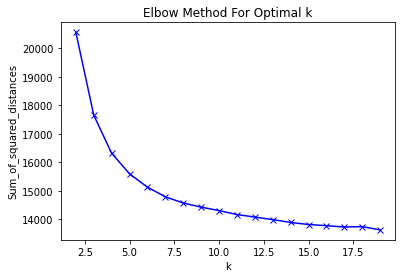

In [218]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [220]:
kmeans = KMeans(n_clusters=7, random_state=42).fit(vectors)

labels = kmeans.labels_
data["labels"] = labels

In [222]:
data["labels"].value_counts()

4    4954
1    4472
2    3477
6    2839
5    1069
0    1005
3     138
Name: labels, dtype: int64

In [259]:
sc = df_final.tolist()

In [265]:
data['scaler'] = sc

In [269]:
data

,tokens,_id,vector,labels,scaler
0,"[disasters, north, china, plain, soil, water, ...",53e99784b7602d9701f3e133,"[[0.0026838344], [0.0016127873], [0.007130103]...",6,"[0.4734036922454834, 0.45486414432525635, 0.48..."
1,"[variations, deep, submicron, shift, determini...",53e99784b7602d9701f3e15d,"[[0.0034696253], [0.0033773829], [0.010877214]...",0,"[0.538163423538208, 0.6303530931472778, 0.6656..."
2,"[constructing, cope, dynamically, changing, gr...",53e99784b7602d9701f3eaf2,"[[0.0031891991], [0.0022976154], [0.010080342]...",2,"[0.5150524973869324, 0.5229702591896057, 0.626..."
3,"[welcome, proceedings, foreword]",53e99784b7602d9701f3f8c1,"[[0.00234202], [0.0012482348], [0.004333031], ...",5,"[0.4452335834503174, 0.4186094403266907, 0.347..."
4,"[biomolecular, molecular, biology, contributio...",53e99784b7602d9701f3f8c2,"[[0.003227246], [0.0027810044], [0.009034733],...",4,"[0.5181881189346313, 0.5710432529449463, 0.576..."
...,...,...,...,...,...
17949,"[witnessed, explosive, exciting, growth, excit...",53e99808b7602d970201b271,"[[0.0038913274], [0.0025569054], [0.008529539]...",4,"[0.5729172825813293, 0.5487566590309143, 0.551..."
17950,"[reducing, ambiguity, multimodal, containing, ...",53e99808b7602d970201b980,"[[0.0027406858], [0.0020973242], [0.008612389]...",4,"[0.47808900475502014, 0.5030513405799866, 0.55..."
17951,"[deal, czech, mwe, containing, moment, mwes, t...",53e99808b7602d970201b981,"[[0.0028659499], [0.0016204157], [0.006706886]...",6,"[0.48841243982315063, 0.4556227922439575, 0.46..."
17952,"[interested, layer, completely, portable, plug...",53e99808b7602d970201b982,"[[0.0025326964], [0.002720653], [0.007890217],...",1,"[0.4609478712081909, 0.5650413632392883, 0.520..."


In [271]:
data.to_csv("dataset_for_classification.csv", index=False)

In [234]:
y_kmeans = kmeans.predict(vectors)

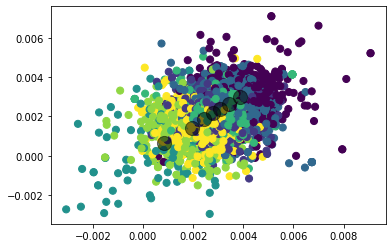

In [235]:
plt.scatter(vectors[:, 0], vectors[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);